In [3]:
from data_reader import Vocabulary, HWDBDatasetHelper, LMDBReader

# your path to data
train_path = r'/DATA/ichuviliaeva/ocr_data/train.lmdb'
test_path = r'/DATA/ichuviliaeva/ocr_data/test.lmdb'
gt_path = r'/DATA/ichuviliaeva/ocr_data/gt.txt'

# Simple CNN baseline

pytorch and lmdb are required for this baseline implementation

## Baseline method

- Naively resize to 32x32 (DON'T DO THIS IN YOUR WORK, try to save geometry somehow, it is important)
- Train LeNet-like CNN
- Enjoy :)

In [4]:
import cv2
import numpy as np

### Data tools

In [5]:
train_reader = LMDBReader(train_path)
train_reader.open()
train_helper = HWDBDatasetHelper(train_reader)

In [6]:
train_helper, val_helper = train_helper.train_val_split()

In [7]:
train_helper.size(), val_helper.size()

(2578433, 644609)

In [73]:
class pad_prune(object):
    
    def __init__(self, output_w, output_h):
        self.output_w = output_w
        self.output_h = output_h

    def __call__(self, image):
        
        w, h = image.shape
        diff_w = w - self.output_w
        diff_h = h - self.output_h
        masked = np.zeros((self.output_w, self.output_h))
        if diff_w <= 0:
            if diff_h <= 0:
                masked[:w, :h] = image
            else:
                masked[:w, :] = image[:, (diff_h // 2):(h - (diff_h - diff_h // 2))]
            
        if diff_w > 0:
            if diff_h > 0:
                masked = image[(diff_w // 2):(w - (diff_w - diff_w // 2)), 
                               (diff_h // 2):(h - (diff_h - diff_h // 2))]
            else:
                masked[:, :h] = image[(diff_w // 2):(w - (diff_w - diff_w // 2)), :]
        return masked - 127.5 / 255.0   

In [74]:
transformation = pad_prune(128, 128)
for t in tqdm(range(train_helper.size())):
    img, label = train_helper.get_item(t)
    res = transformation(img)
    if t % 100000 == 0:
        print('image shape: ', img.shape, ' res shape: ', res.shape)

  0%|                                                            | 1368/2578433 [00:00<06:19, 6793.37it/s]

image shape:  (78, 84)  res shape:  (128, 128)


  4%|██▎                                                       | 100853/2578433 [00:15<06:04, 6789.24it/s]

image shape:  (63, 90)  res shape:  (128, 128)


  8%|████▌                                                     | 201309/2578433 [00:30<06:02, 6557.80it/s]

image shape:  (42, 44)  res shape:  (128, 128)


 12%|██████▊                                                   | 301125/2578433 [00:46<05:59, 6331.30it/s]

image shape:  (71, 76)  res shape:  (128, 128)


 16%|█████████                                                 | 400890/2578433 [01:01<05:34, 6515.34it/s]

image shape:  (72, 83)  res shape:  (128, 128)


 19%|███████████▎                                              | 500746/2578433 [01:16<05:19, 6493.23it/s]

image shape:  (88, 52)  res shape:  (128, 128)


 23%|█████████████▌                                            | 601093/2578433 [01:31<04:55, 6701.60it/s]

image shape:  (69, 62)  res shape:  (128, 128)


 27%|███████████████▊                                          | 700668/2578433 [01:47<04:51, 6444.17it/s]

image shape:  (93, 71)  res shape:  (128, 128)


 31%|██████████████████                                        | 801164/2578433 [02:02<04:33, 6504.35it/s]

image shape:  (81, 98)  res shape:  (128, 128)


 35%|████████████████████▎                                     | 901159/2578433 [02:18<04:06, 6790.88it/s]

image shape:  (102, 85)  res shape:  (128, 128)


 39%|██████████████████████                                   | 1000812/2578433 [02:33<04:11, 6267.81it/s]

image shape:  (71, 104)  res shape:  (128, 128)


 43%|████████████████████████▎                                | 1101233/2578433 [02:48<03:51, 6379.64it/s]

image shape:  (88, 95)  res shape:  (128, 128)


 47%|██████████████████████████▌                              | 1200648/2578433 [03:04<03:27, 6641.31it/s]

image shape:  (124, 71)  res shape:  (128, 128)


 50%|████████████████████████████▊                            | 1301021/2578433 [03:19<03:18, 6423.40it/s]

image shape:  (106, 95)  res shape:  (128, 128)


 54%|██████████████████████████████▉                          | 1401330/2578433 [03:35<02:55, 6706.27it/s]

image shape:  (78, 46)  res shape:  (128, 128)


 58%|█████████████████████████████████▏                       | 1500870/2578433 [03:50<02:59, 5994.50it/s]

image shape:  (59, 36)  res shape:  (128, 128)


 62%|███████████████████████████████████▍                     | 1600850/2578433 [04:06<02:27, 6626.80it/s]

image shape:  (80, 63)  res shape:  (128, 128)


 66%|█████████████████████████████████████▌                   | 1701066/2578433 [04:21<02:23, 6133.87it/s]

image shape:  (102, 79)  res shape:  (128, 128)


 70%|███████████████████████████████████████▊                 | 1801276/2578433 [04:36<01:56, 6647.04it/s]

image shape:  (73, 43)  res shape:  (128, 128)


 74%|██████████████████████████████████████████               | 1900930/2578433 [04:52<01:51, 6090.62it/s]

image shape:  (31, 19)  res shape:  (128, 128)


 78%|████████████████████████████████████████████▏            | 2001000/2578433 [05:08<01:28, 6491.24it/s]

image shape:  (90, 93)  res shape:  (128, 128)


 81%|██████████████████████████████████████████████▍          | 2100620/2578433 [05:23<01:14, 6388.68it/s]

image shape:  (58, 93)  res shape:  (128, 128)


 85%|████████████████████████████████████████████████▋        | 2201215/2578433 [05:39<01:00, 6198.33it/s]

image shape:  (93, 66)  res shape:  (128, 128)


 89%|██████████████████████████████████████████████████▊      | 2300748/2578433 [05:55<00:41, 6612.42it/s]

image shape:  (78, 94)  res shape:  (128, 128)


 93%|█████████████████████████████████████████████████████    | 2400701/2578433 [06:10<00:27, 6444.42it/s]

image shape:  (72, 63)  res shape:  (128, 128)


 97%|███████████████████████████████████████████████████████▎ | 2500884/2578433 [06:26<00:12, 6126.71it/s]

image shape:  (44, 34)  res shape:  (128, 128)


100%|█████████████████████████████████████████████████████████| 2578433/2578433 [06:38<00:00, 6476.45it/s]


In [75]:
import torch

from torch.utils.data import Dataset, DataLoader
from torch import nn

class HWDBDataset(Dataset):
    def __init__(self, helper: HWDBDatasetHelper, transform = None):
        self.helper = helper
        self.transform = transform
    
    def __len__(self):
        return self.helper.size()
    
    def __getitem__(self, idx):
        img, label = self.helper.get_item(idx)
        if self.transform:
            img = self.transform(img)
        return img, label

In [76]:
to_one_shape = pad_prune(128, 128)
train_dataset = HWDBDataset(train_helper, to_one_shape)
val_dataset = HWDBDataset(val_helper, to_one_shape)

### Model & training

In [77]:
class LeNet(nn.Module):
    def __init__(self, n_classes):
        super(LeNet, self).__init__()
        self.nn = nn.Sequential(
            nn.Conv2d(1, 4, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d((2, 2)), # [64, 64, 4] 
            
            nn.Conv2d(4, 8, kernel_size=3, padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.Conv2d(8, 8, kernel_size=3, padding=1),
            nn.MaxPool2d((2, 2)), # [32, 32, 8] 
            
            nn.Conv2d(8, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Conv2d(16, 16, kernel_size=3, padding=1),
            nn.MaxPool2d((2, 2)), # [16, 16, 16]
            
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.MaxPool2d((2, 2)), # [8, 8, 32]
            
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d((2, 2)), # [4, 4, 64]
            
            nn.Flatten(),
            nn.Linear(4 * 4 * 64, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            
            nn.Linear(256, n_classes, bias=False)
        )
    
    def forward(self, x):
        return self.nn(x)

In [78]:
model = LeNet(train_helper.vocabulary.num_classes())
model.eval()

LeNet(
  (nn): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (13): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): BatchNorm

In [79]:
model(torch.tensor(train_dataset[0][0], dtype=torch.float32).view(1, 1, 128, 128))

tensor([[-0.0254,  0.0250, -0.0358,  ..., -0.0471,  0.1480, -0.1036]],
       grad_fn=<MmBackward>)

In [80]:
model = model.cuda()

In [81]:
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True, drop_last=True, num_workers=8)
val_loader = DataLoader(val_dataset, batch_size=2048, shuffle=False, num_workers=8)

In [82]:
optim = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()

In [83]:
from tqdm import tqdm


def run_validation(val_loader: DataLoader, model: nn.Module, n_steps=None):
    model.eval()
    n_good = 0
    n_all = 0
    wrapper = lambda x: x
    if n_steps is None:
        n_steps = len(val_loader)
        wrapper = tqdm
    
    with torch.no_grad():
        for batch, (X, y) in enumerate(wrapper(val_loader)):
            if batch == n_steps:
                break
            logits = model(X.unsqueeze(1).to(torch.float32).cuda())
            classes = torch.argmax(logits, dim=1).cpu().numpy()
            n_good += sum(classes == y.cpu().numpy())
            n_all += len(classes)
    
    return n_good / n_all


def train_epoch(train_loader: DataLoader, val_loader: DataLoader, model: nn.Module, optim, loss_fn):
    for batch, (X, y) in enumerate(tqdm(train_loader)):
        model.train()
        logits = model(X.unsqueeze(1).to(torch.float32).cuda())
        loss = loss_fn(logits, y.to(torch.long).cuda())
        
        optim.zero_grad()
        loss.backward()
        optim.step()

In [84]:
torch.save(model.state_dict(), 'baseline_played.pth')

In [85]:
for epoch in range(10):
    print(f'Epoch {epoch}:')
    train_epoch(train_loader, val_loader, model, optim, loss_fn)
    accuracy = run_validation(val_loader, model)
    print(f'accuracy: {accuracy}')
    torch.save(model.state_dict(), f'baseline_played_epoch{epoch}.pth')

Epoch 0:


100%|███████████████████████████████████████████████████████████████████| 315/315 [00:41<00:00,  7.56it/s]


accuracy: 0.7756609045173121
Epoch 1:


100%|███████████████████████████████████████████████████████████████████| 315/315 [00:41<00:00,  7.64it/s]


accuracy: 0.8368887185875469
Epoch 2:


100%|███████████████████████████████████████████████████████████████████| 315/315 [00:41<00:00,  7.60it/s]


accuracy: 0.8710861933358052
Epoch 3:


100%|███████████████████████████████████████████████████████████████████| 315/315 [00:41<00:00,  7.65it/s]


accuracy: 0.8755121321607362
Epoch 4:


100%|███████████████████████████████████████████████████████████████████| 315/315 [00:41<00:00,  7.56it/s]


accuracy: 0.882541199393741
Epoch 5:


100%|███████████████████████████████████████████████████████████████████| 315/315 [00:41<00:00,  7.55it/s]


accuracy: 0.8851955216262882
Epoch 6:


100%|███████████████████████████████████████████████████████████████████| 315/315 [00:42<00:00,  7.38it/s]


accuracy: 0.8803429675974118
Epoch 7:


100%|███████████████████████████████████████████████████████████████████| 315/315 [00:41<00:00,  7.62it/s]


accuracy: 0.8883803980397419
Epoch 8:


100%|███████████████████████████████████████████████████████████████████| 315/315 [00:42<00:00,  7.40it/s]


accuracy: 0.8794261327409328
Epoch 9:


100%|███████████████████████████████████████████████████████████████████| 315/315 [00:41<00:00,  7.50it/s]

accuracy: 0.8861806149153983


### Evaluation

In [86]:
test_path = r'/DATA/ichuviliaeva/ocr_data/test.lmdb'
pred_path = './pred_playground.txt'

test_reader = LMDBReader(test_path)
test_reader.open()
test_helper = HWDBDatasetHelper(test_reader, prefix='Test')

In [89]:
test_dataset = HWDBDataset(test_helper, to_one_shape)
test_loader = DataLoader(test_dataset, batch_size=2048, shuffle=False, num_workers=8)

In [90]:
preds = []
model.eval()
with torch.no_grad():
    for X, _ in tqdm(test_loader):
        logits = model(X.unsqueeze(1).to(torch.float32).cuda())
        classes = torch.argmax(logits, dim=1).cpu().numpy()
        preds.extend(classes)

100%|███████████████████████████████████████████████████████████████████| 380/380 [00:50<00:00,  7.58it/s]


In [91]:
with open(pred_path, 'w') as f_pred:
    for idx, pred in enumerate(preds):
        name = test_helper.namelist[idx]
        cls = train_helper.vocabulary.class_by_index(pred)
        print(name, cls, file=f_pred)

In [92]:
!python -m course_ocr_t2.evaluate
# Accuracy = 0.7978

/bin/bash: /home/ichuviliaeva/miniconda3/envs/ocr_course/lib/python3.8/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)
pred_path =  /home/ichuviliaeva/ocr_course/course_ocr/task2/pred_playground.txt
Accuracy = 0.8325


In [ ]:
# with resize to 64 x 64 get 0.8166 accuracy -- remember that
# with almost saving geometry at 128 x 128 get 0.8325 accuracy

In [45]:
train_sizes = []
val_sizes = []

In [46]:
for t in range(train_helper.size()):
    img, label = train_helper.get_item(t)
    train_sizes.append(img.shape)
    if t % 100000 == 0:
        print(len(train_sizes))

1
100001
200001
300001
400001
500001
600001
700001
800001
900001
1000001
1100001
1200001
1300001
1400001
1500001
1600001
1700001
1800001
1900001
2000001
2100001
2200001
2300001
2400001
2500001


In [47]:
for t in range(val_helper.size()):
    img, label = val_helper.get_item(t)
    val_sizes.append(img.shape)
    if t % 100000 == 0:
        print(len(val_sizes))

1
100001
200001
300001
400001
500001
600001


In [48]:
train_sizes = np.array(train_sizes)
val_sizes = np.array(val_sizes)

In [49]:
print(train_sizes.shape)

(2578433, 2)


In [50]:
import matplotlib.pyplot as plt

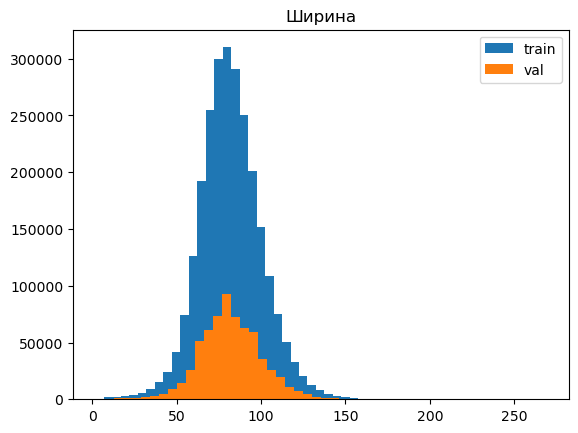

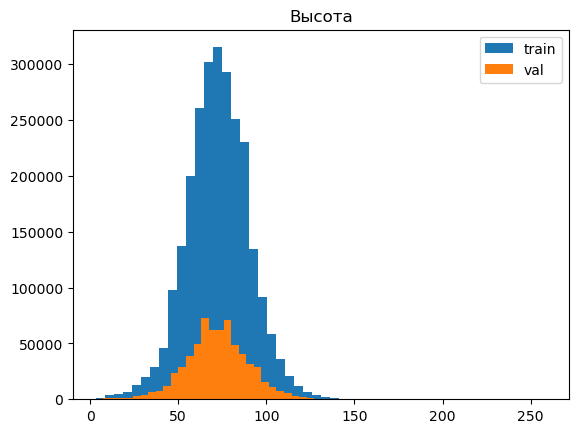

In [65]:
plt.hist(train_sizes[:, 0], bins = 50, label = 'train')
plt.hist(val_sizes[:, 0], bins = 50, label = 'val')
plt.title('Ширина')
plt.legend()
plt.show()

plt.hist(train_sizes[:, 1], bins = 50, label = 'train')
plt.hist(val_sizes[:, 1], bins = 50, label = 'val')
plt.title('Высота')
plt.legend()
plt.show()

In [ ]:
# взять размер 128 х 128 и тупо дополнить нулями, где не хватает. Где много - обрезка.

In [72]:
img, label = train_helper.get_item(0)

In [76]:
img.shape

(78, 84)

In [78]:
masked = torch.zeros((128, 128))
masked[:img.shape[0], :img.shape[1]] = torch.tensor(img)

In [79]:
print(masked)

tensor([[255., 255., 255.,  ...,   0.,   0.,   0.],
        [255., 255., 255.,  ...,   0.,   0.,   0.],
        [255., 255., 255.,  ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        [  0.,   0.,   0.,  ...,   0.,   0.,   0.]])


In [89]:
img_rand = torch.rand((133, 140))

In [90]:
w, h = img_rand.shape
diff_w = w - 128
diff_h = h - 128
masked = torch.zeros((128, 128))
masked = torch.tensor(img_rand[(diff_w // 2):(w - diff_w), (diff_h // 2):(h - diff_h)])

/tmp/ipykernel_2554219/2122049748.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  masked = torch.tensor(img_rand[(diff_w // 2):(w - diff_w), (diff_h // 2):(h - diff_h)])


In [91]:
print(masked)

tensor([[0.7955, 0.0157, 0.8531,  ..., 0.7344, 0.5561, 0.9470],
        [0.7436, 0.8476, 0.8353,  ..., 0.7002, 0.8984, 0.5729],
        [0.8020, 0.9979, 0.4592,  ..., 0.9926, 0.4855, 0.6594],
        ...,
        [0.7656, 0.1233, 0.8527,  ..., 0.3913, 0.0388, 0.7193],
        [0.2448, 0.2325, 0.5297,  ..., 0.4655, 0.3920, 0.1027],
        [0.2679, 0.7449, 0.2932,  ..., 0.6783, 0.2164, 0.2352]])


In [33]:
img_rand = np.random.rand(119, 99)
w, h = img_rand.shape
diff_w = w - 128
diff_h = h - 128
print('diff_w = ', diff_w)
print('diff_h = ', diff_h)
masked = np.zeros((128, 128))
        
if diff_w <= 0:
    if diff_h <= 0:
        masked[:w, :h] = img_rand
        print('was here')
    else:
        masked[:w, :] = img_rand[:, (diff_h // 2):(h - diff_h)]
            
if diff_w > 0:
    if diff_h > 0:
        masked = img_rand[(diff_w // 2):(w - diff_w), (diff_h // 2):(h - diff_h)]
    else:
        masked[:, :h] = img_rand[(diff_w // 2):(w - diff_w), :]

diff_w =  -9
diff_h =  -29
was here
